# Importando libs

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats import weightstats as stests

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Carregando e lendo os dados

In [51]:
df = pd.read_excel('Detran.xlsx')
df.head()

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA.CNH,TEMPO.CNH,ENVOL. ACIDENTE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,Salinopolis,M,32,AB,3.0,N,C,B,A,B,B,NaN,NaN,NaN,NaN,NaN
1,2,Salinopolis,M,38,A,10.0,N,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN
2,3,Salinopolis,M,42,A,24.0,S,D,B,A,B,B,NaN,NaN,NaN,NaN,NaN
3,4,Salinopolis,M,24,AB,6.0,N,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN
4,5,Salinopolis,M,23,AB,6.0,S,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN


# limpeza e exploração do dataset

In [52]:
#removendo colunas desnecessárias

df = df.drop(['Q6','Q7','Q8','Q9','Q10'], axis=1)
df = df.rename(columns={'CATEGORIA.CNH':'CATEGORIA_CNH',
                        'TEMPO.CNH': 'TEMPO_CNH','ENVOL. ACIDENTE':'ENVOL_ACIDENTE'})
df.head()

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA_CNH,TEMPO_CNH,ENVOL_ACIDENTE,Q1,Q2,Q3,Q4,Q5
0,1,Salinopolis,M,32,AB,3.0,N,C,B,A,B,B
1,2,Salinopolis,M,38,A,10.0,N,A,B,A,B,B
2,3,Salinopolis,M,42,A,24.0,S,D,B,A,B,B
3,4,Salinopolis,M,24,AB,6.0,N,A,B,A,B,B
4,5,Salinopolis,M,23,AB,6.0,S,A,B,A,B,B


In [53]:
#vendo melhor os valores nulos
df.isnull().sum()

ID                  0
MUNICIPIO           0
SEXO                0
IDADE               0
CATEGORIA_CNH       6
TEMPO_CNH          11
ENVOL_ACIDENTE      8
Q1                159
Q2                159
Q3                159
Q4                  0
Q5                 87
dtype: int64

In [54]:
df = df.dropna() #excluindo valores nulos

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 265
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              109 non-null    int64  
 1   MUNICIPIO       109 non-null    object 
 2   SEXO            109 non-null    object 
 3   IDADE           109 non-null    int64  
 4   CATEGORIA_CNH   109 non-null    object 
 5   TEMPO_CNH       109 non-null    float64
 6   ENVOL_ACIDENTE  109 non-null    object 
 7   Q1              109 non-null    object 
 8   Q2              109 non-null    object 
 9   Q3              109 non-null    object 
 10  Q4              109 non-null    object 
 11  Q5              109 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 11.1+ KB


In [56]:
#análise variáveis quantitativas
df.describe()

,ID,IDADE,TEMPO_CNH
count,109.000000,109.000000,109.000000
mean,139.834862,43.302752,17.779817
std,99.584183,12.116338,11.649478
min,1.000000,19.000000,1.000000
25%,29.000000,35.000000,10.000000
50%,139.000000,42.000000,16.000000
75%,236.000000,51.000000,25.000000
max,266.000000,75.000000,53.000000


In [57]:
#contagem de valores para cada questão
print(df.Q1.value_counts())
print(df.Q2.value_counts())
print(df.Q3.value_counts())
print(df.Q4.value_counts())


B    46
A    31
C    17
D    15
Name: Q1, dtype: int64
B    97
A    11
D     1
Name: Q2, dtype: int64
A    84
D    17
C     4
B     4
Name: Q3, dtype: int64
B    108
D      1
Name: Q4, dtype: int64


##Sexo por questão

In [58]:
group1 = df.groupby(by=['SEXO','Q1'])['Q1'].count()
group1

SEXO  Q1
F     A     10
      B     16
      C      4
      D      1
M     A     21
      B     30
      C     13
      D     14
Name: Q1, dtype: int64

In [59]:
group2 = df.groupby(by=['SEXO','Q2'])['Q2'].count()
group2

SEXO  Q2
F     A      3
      B     27
      D      1
M     A      8
      B     70
Name: Q2, dtype: int64

In [60]:
group3 = df.groupby(by=['SEXO','Q3'])['Q3'].count()
group3

SEXO  Q3
F     A     24
      B      1
      D      6
M     A     60
      B      3
      C      4
      D     11
Name: Q3, dtype: int64

In [61]:
group4 = df.groupby(by=['SEXO','Q4'])['Q4'].count()
group4

SEXO  Q4
F     B     31
M     B     77
      D      1
Name: Q4, dtype: int64

In [62]:
group5 = df.groupby(by=['SEXO','Q5'])['Q5'].count()
group5

SEXO  Q5
F     B     31
M     A      2
      B     76
Name: Q5, dtype: int64

## Categoria CNH por questão

In [63]:
group1 = df.groupby(by=['CATEGORIA_CNH','Q1'])['Q1'].count()
group1

CATEGORIA_CNH  Q1
A              A      1
               B      3
               C      1
               D      2
AB             A     18
               B     19
               C      7
               D      7
AD             B      1
               D      1
AE             B      2
B              A      9
               B     16
               C      8
               D      3
C              D      1
D              A      3
               B      4
               C      1
               D      1
E              B      1
Name: Q1, dtype: int64

In [64]:
group2 = df.groupby(by=['CATEGORIA_CNH','Q2'])['Q2'].count()
group2

CATEGORIA_CNH  Q2
A              B      7
AB             A      7
               B     43
               D      1
AD             A      1
               B      1
AE             B      2
B              A      2
               B     34
C              B      1
D              B      9
E              A      1
Name: Q2, dtype: int64

In [65]:
group3 = df.groupby(by=['CATEGORIA_CNH','Q3'])['Q3'].count()
group3

CATEGORIA_CNH  Q3
A              A      5
               D      2
AB             A     39
               B      3
               C      1
               D      8
AD             A      2
AE             A      2
B              A     30
               B      1
               C      1
               D      4
C              D      1
D              A      6
               C      2
               D      1
E              D      1
Name: Q3, dtype: int64

In [66]:
group4 = df.groupby(by=['CATEGORIA_CNH','Q4'])['Q4'].count()
group4

CATEGORIA_CNH  Q4
A              B      7
AB             B     50
               D      1
AD             B      2
AE             B      2
B              B     36
C              B      1
D              B      9
E              B      1
Name: Q4, dtype: int64

In [67]:
group5 = df.groupby(by=['CATEGORIA_CNH','Q5'])['Q5'].count()
group5

CATEGORIA_CNH  Q5
A              B      7
AB             B     51
AD             B      2
AE             B      2
B              A      1
               B     35
C              B      1
D              A      1
               B      8
E              B      1
Name: Q5, dtype: int64

## Município por questão

In [68]:
group1 = df.groupby(by=['MUNICIPIO','Q1'])['Q1'].count()
group1

MUNICIPIO    Q1
Benevides    A      3
             B     10
             C      2
             D      1
Bragaa       A     15
             B     17
             C      8
             D      8
Mosqueiro    A      1
             B      1
             C      1
             D      1
Salinopolis  A     12
             B     18
             C      6
             D      5
Name: Q1, dtype: int64

In [69]:
group2 = df.groupby(by=['MUNICIPIO','Q2'])['Q2'].count()
group2

MUNICIPIO    Q2
Benevides    A      2
             B     14
Bragaa       A      5
             B     42
             D      1
Mosqueiro    B      4
Salinopolis  A      4
             B     37
Name: Q2, dtype: int64

In [70]:
group3 = df.groupby(by=['MUNICIPIO','Q3'])['Q3'].count()
group3

MUNICIPIO    Q3
Benevides    A     12
             D      4
Bragaa       A     35
             B      3
             C      2
             D      8
Mosqueiro    A      3
             B      1
Salinopolis  A     34
             C      2
             D      5
Name: Q3, dtype: int64

In [71]:
group4 = df.groupby(by=['MUNICIPIO','Q4'])['Q4'].count()
group4

MUNICIPIO    Q4
Benevides    B     16
Bragaa       B     48
Mosqueiro    B      4
Salinopolis  B     40
             D      1
Name: Q4, dtype: int64

In [72]:
group5 = df.groupby(by=['MUNICIPIO','Q5'])['Q5'].count()
group5

MUNICIPIO    Q5
Benevides    B     16
Bragaa       B     48
Mosqueiro    B      4
Salinopolis  A      2
             B     39
Name: Q5, dtype: int64

## Envolvido em acidente por questão

In [73]:
group1 = df.groupby(by=['ENVOL_ACIDENTE','Q1'])['Q1'].count()
group1

ENVOL_ACIDENTE  Q1
N               A     28
                B     36
                C     13
                D      8
S               A      3
                B     10
                C      4
                D      7
Name: Q1, dtype: int64

In [74]:
group2 = df.groupby(by=['ENVOL_ACIDENTE','Q2'])['Q2'].count()
group2

ENVOL_ACIDENTE  Q2
N               A     10
                B     74
                D      1
S               A      1
                B     23
Name: Q2, dtype: int64

In [75]:
group3 = df.groupby(by=['ENVOL_ACIDENTE','Q3'])['Q3'].count()
group3

ENVOL_ACIDENTE  Q3
N               A     65
                B      2
                C      3
                D     15
S               A     19
                B      2
                C      1
                D      2
Name: Q3, dtype: int64

In [76]:
group4 = df.groupby(by=['ENVOL_ACIDENTE','Q4'])['Q4'].count()
group4

ENVOL_ACIDENTE  Q4
N               B     85
S               B     23
                D      1
Name: Q4, dtype: int64

In [77]:
group5 = df.groupby(by=['ENVOL_ACIDENTE','Q5'])['Q5'].count()
group5

ENVOL_ACIDENTE  Q5
N               B     85
S               A      2
                B     22
Name: Q5, dtype: int64

# Adicionando o gabarito ao df

In [78]:
def correcao(df):
  if df.Q1 == 'SI':
    return 'SI'
  elif df.Q1 == 'B':
    return 1
  else:
    return 0

df['q1_gab'] = df.apply(correcao, axis = 1)

In [79]:
def correcao2(df):
  if df.Q2 == 'SI':
    return 'SI'
  elif df.Q2 == 'B':
    return 1
  else:
    return 0

df['q2_gab'] = df.apply(correcao2, axis = 1)

In [80]:
def correcao3(df):
  if df.Q3 == 'SI':
    return 'SI'
  elif df.Q3 == 'A':
    return 1
  else:
    return 0

df['q3_gab'] = df.apply(correcao3, axis = 1)

In [81]:
def correcao4(df):
  if df.Q4 == 'SI':
    return 'SI'
  elif df.Q4 == 'B':
    return 1
  else:
    return 0

df['q4_gab'] = df.apply(correcao4, axis = 1)

In [82]:
def correcao5(df):
  if df.Q5 == 'SI':
    return 'SI'
  elif df.Q5 == 'B':
    return 1
  else:
    return 0

df['q5_gab'] = df.apply(correcao5, axis = 1)

In [83]:
df.head(10) #1 para respostas corretas e 0 para incorretas

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA_CNH,TEMPO_CNH,ENVOL_ACIDENTE,Q1,Q2,Q3,Q4,Q5,q1_gab,q2_gab,q3_gab,q4_gab,q5_gab
0,1,Salinopolis,M,32,AB,3.0,N,C,B,A,B,B,0,1,1,1,1
1,2,Salinopolis,M,38,A,10.0,N,A,B,A,B,B,0,1,1,1,1
2,3,Salinopolis,M,42,A,24.0,S,D,B,A,B,B,0,1,1,1,1
3,4,Salinopolis,M,24,AB,6.0,N,A,B,A,B,B,0,1,1,1,1
4,5,Salinopolis,M,23,AB,6.0,S,A,B,A,B,B,0,1,1,1,1
5,6,Salinopolis,M,64,D,35.0,N,B,B,A,B,B,1,1,1,1,1
6,7,Salinopolis,M,51,AB,25.0,N,B,B,A,B,B,1,1,1,1,1
7,8,Salinopolis,M,45,AB,27.0,N,B,B,A,B,B,1,1,1,1,1
8,9,Salinopolis,M,60,D,20.0,S,B,B,C,B,A,1,1,0,1,0
9,10,Salinopolis,M,54,AB,14.0,N,A,B,D,B,B,0,1,0,1,1


# Resultado quantitativo das repostas ao questionário por questão

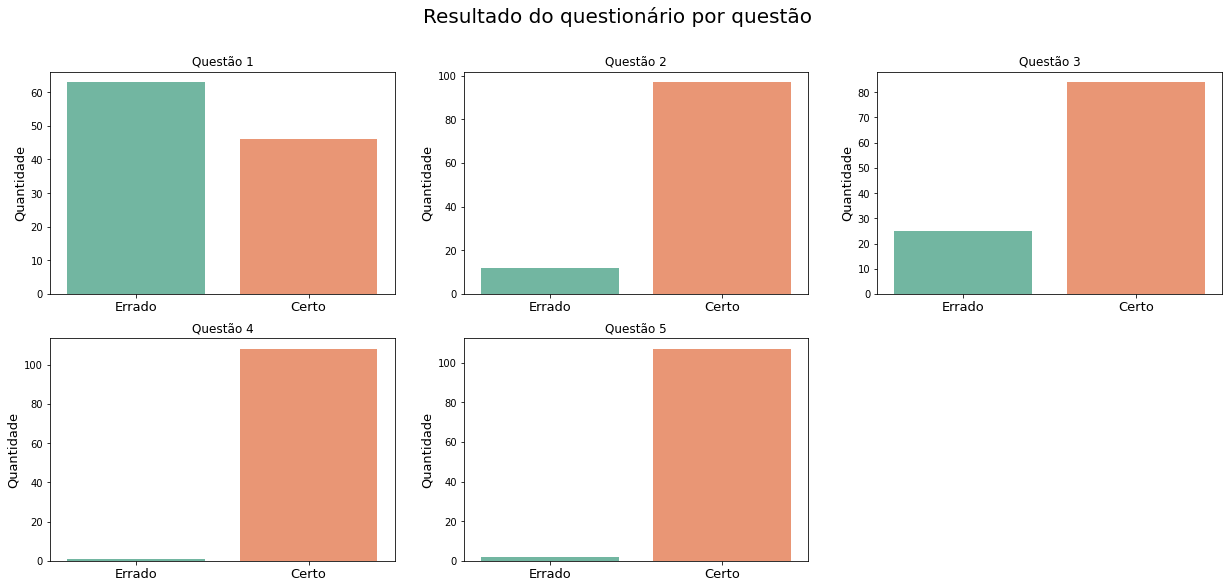

In [84]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.countplot(df.q1_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')


plt.subplot(2,3,2)
ax = sns.countplot(df.q2_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')


plt.subplot(2,3,3)
ax = sns.countplot(df.q3_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 3')


plt.subplot(2,3,4)
ax = sns.countplot(df.q4_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')


plt.subplot(2,3,5)
ax = sns.countplot(df.q5_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 5');


#Catplot por idade por questão

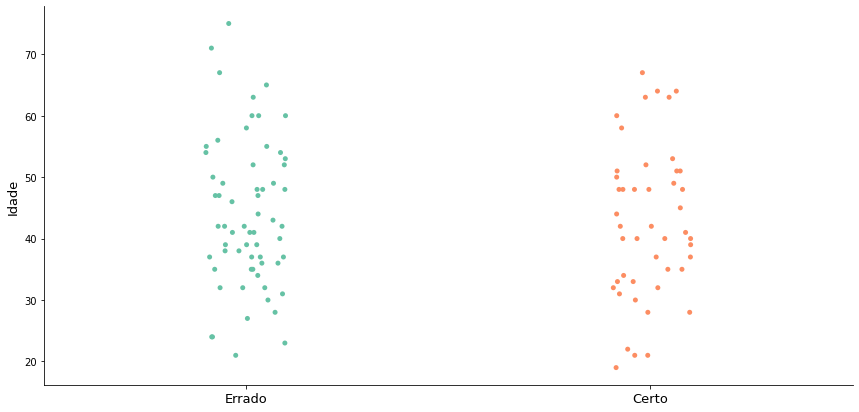

In [85]:
ax = sns.catplot(x='q1_gab', y='IDADE', data=df, height=6, aspect=2, palette="Set2")
ax.set_ylabels('Idade', fontsize=13)
ax.set_xlabels('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
ax

# Violinplot do tempo de cnh por questão

Text(0.5, 1.0, 'Questão 5')

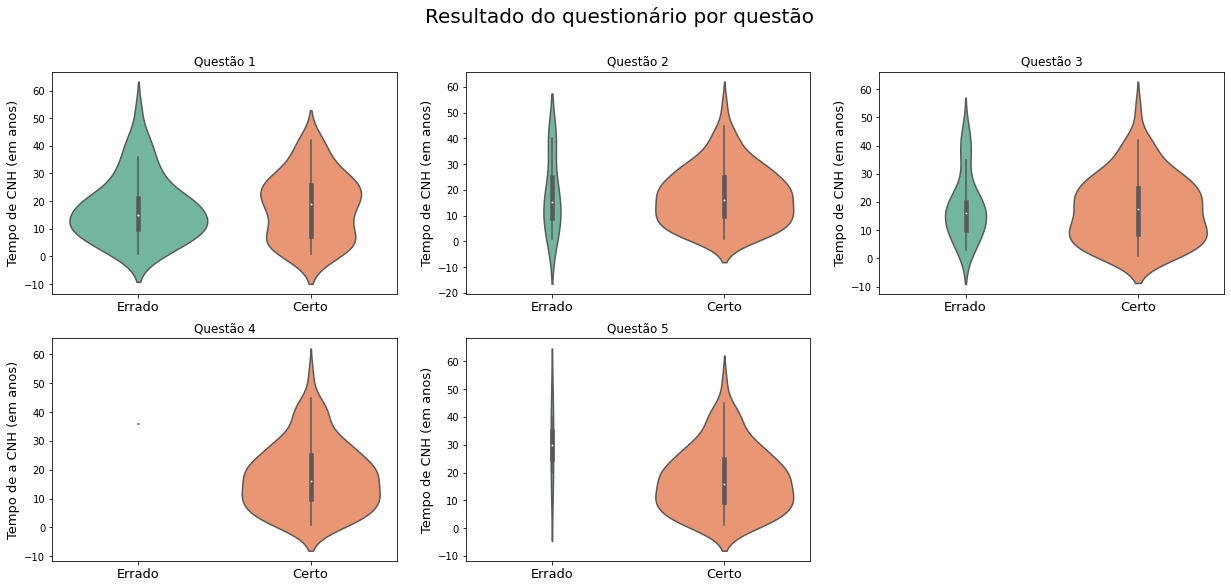

In [103]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.violinplot(x='q1_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')


plt.subplot(2,3,2)
ax = sns.violinplot(x='q2_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.violinplot(x='q3_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.violinplot(x='q4_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de a CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.violinplot(x='q5_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5');


#Boxplots da idade relacionada com as variáveis qualitativas por questão

Text(0.5, 1.0, 'Questão 5')

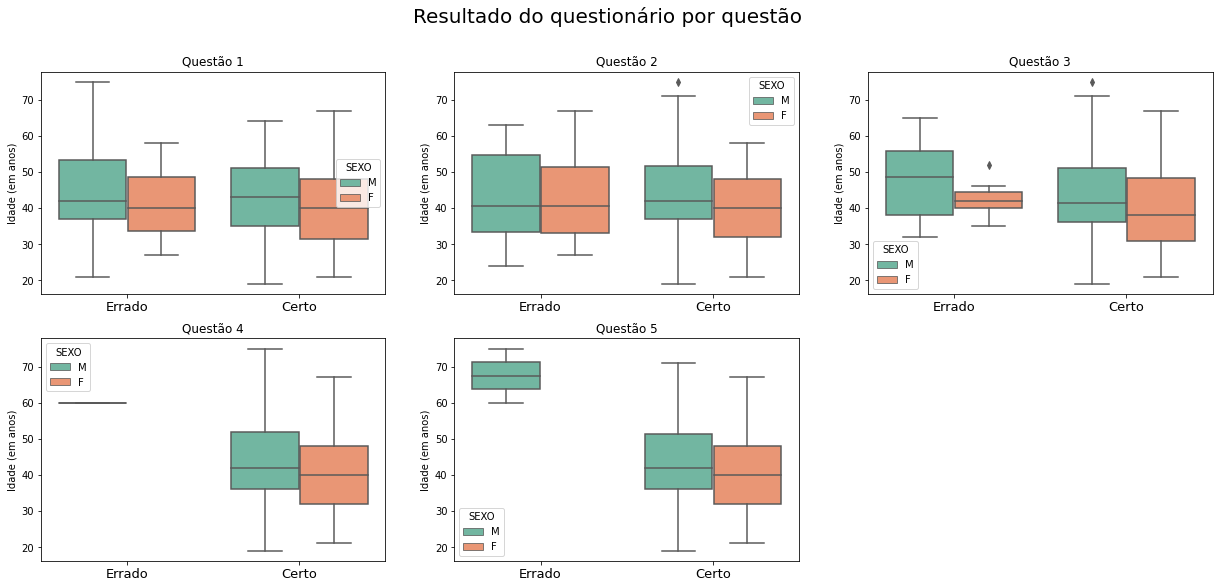

In [104]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='q1_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='q2_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='q3_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='q4_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='q5_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5')


Text(0.5, 1.0, 'Questão 5')

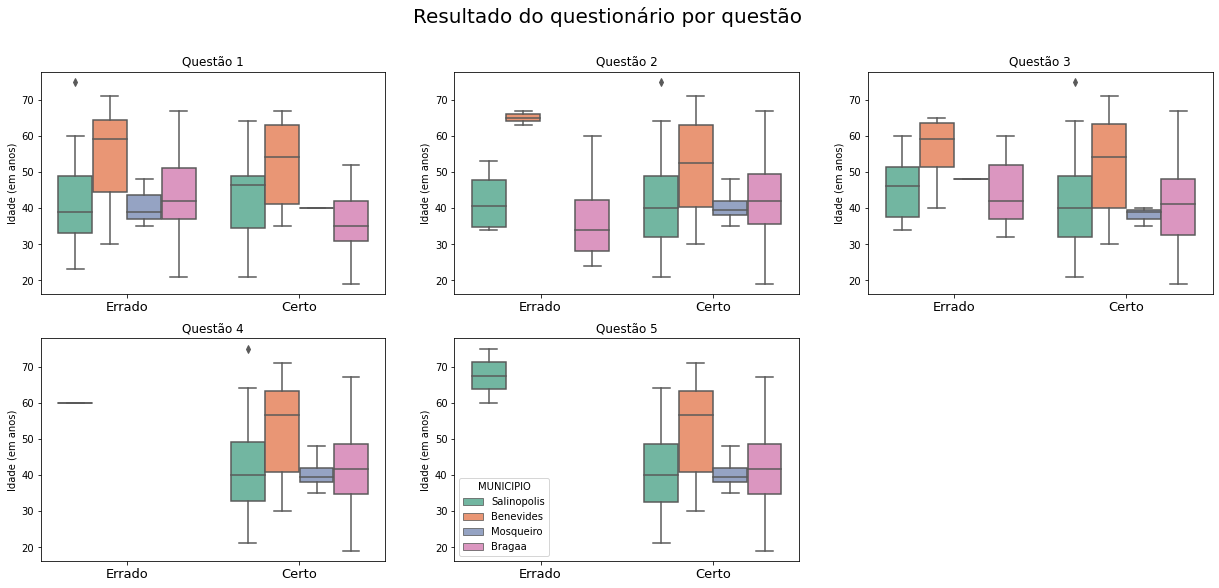

In [105]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='q1_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='q2_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='q3_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='q4_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='q5_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5')


Text(0.5, 1.0, 'Questão 5')

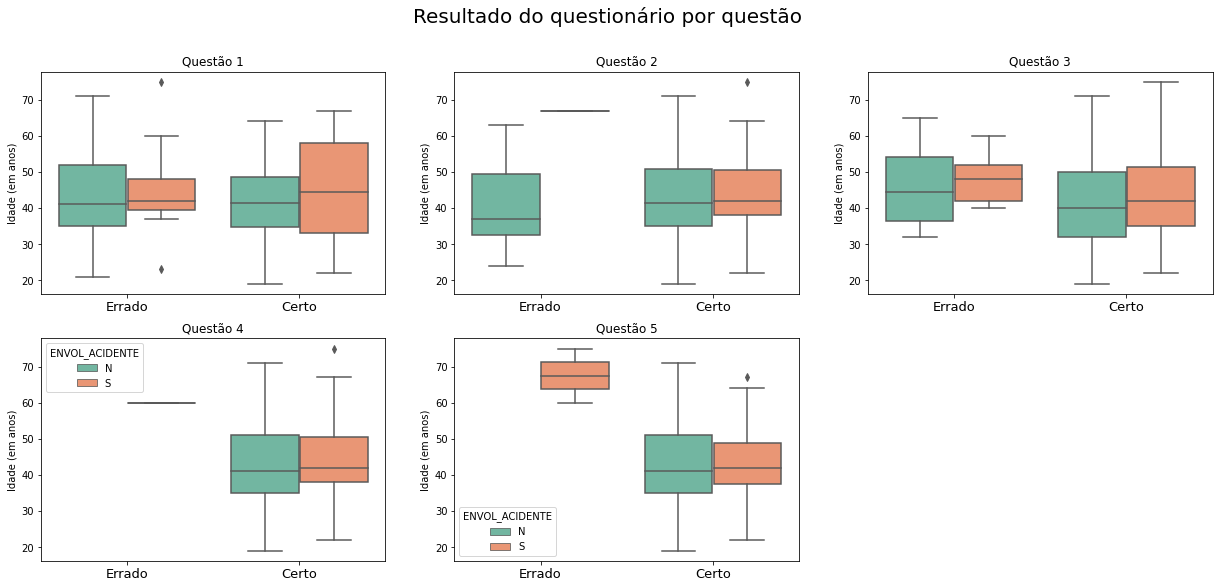

In [106]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='q1_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='q2_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='q3_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='q4_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='q5_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5');


#Boxplots do tempo de cnh relacionada com as variáveis qualitativas por questão

Text(0.5, 1.0, 'Questão 5')

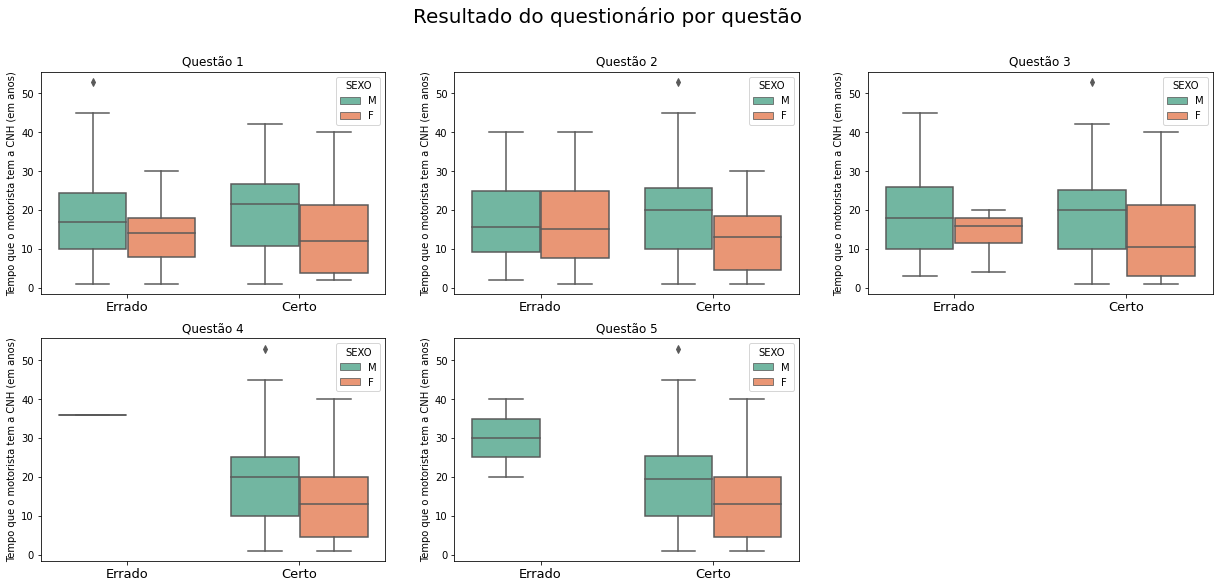

In [107]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='q1_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='q2_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='q3_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='q4_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='q5_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5')


Text(0.5, 1.0, 'Questão 5')

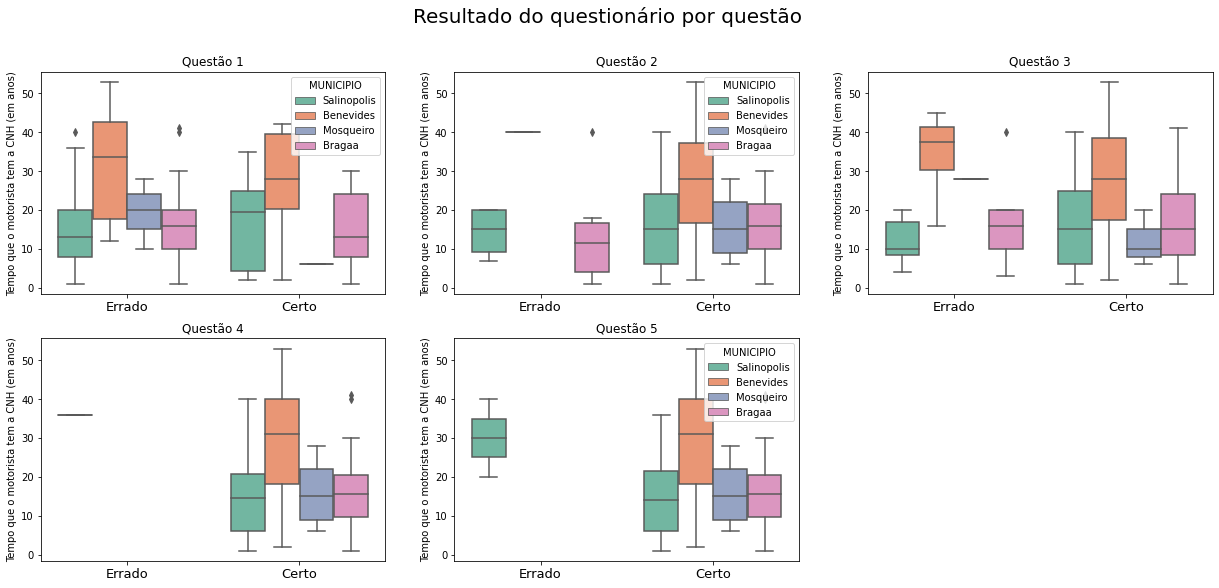

In [108]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='q1_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='q2_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='q3_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='q4_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='q5_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5');


Text(0.5, 1.0, 'Questão 5')

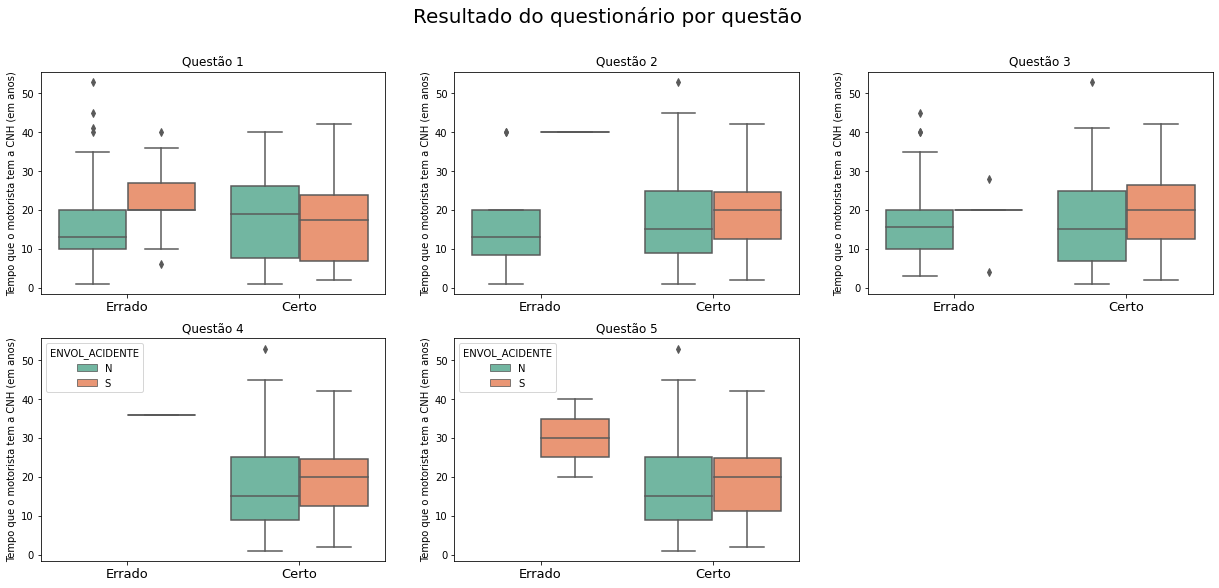

In [109]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='q1_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='q2_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='q3_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='q4_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='q5_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5')


# DISTPLOT

In [95]:
df.head()

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA_CNH,TEMPO_CNH,ENVOL_ACIDENTE,Q1,Q2,Q3,Q4,Q5,q1_gab,q2_gab,q3_gab,q4_gab,q5_gab
0,1,Salinopolis,M,32,AB,3.0,N,C,B,A,B,B,0,1,1,1,1
1,2,Salinopolis,M,38,A,10.0,N,A,B,A,B,B,0,1,1,1,1
2,3,Salinopolis,M,42,A,24.0,S,D,B,A,B,B,0,1,1,1,1
3,4,Salinopolis,M,24,AB,6.0,N,A,B,A,B,B,0,1,1,1,1
4,5,Salinopolis,M,23,AB,6.0,S,A,B,A,B,B,0,1,1,1,1


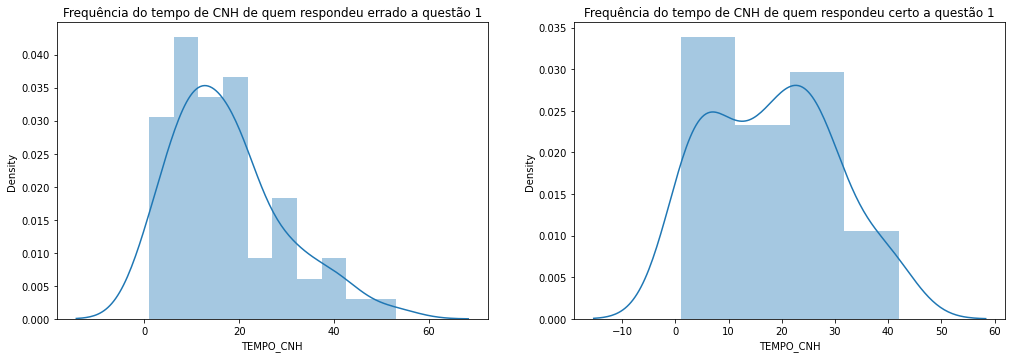

In [111]:
errado = df.query('q1_gab == 0')['TEMPO_CNH']
certo = df.query('q1_gab == 1')['TEMPO_CNH']

plt.figure(figsize=(17,12))

plt.subplot(2, 2, 1)
sns.distplot(errado)
plt.title('Frequência do tempo de CNH de quem respondeu errado a questão 1')

plt.subplot(2, 2, 2)
sns.distplot(certo)
plt.title('Frequência do tempo de CNH de quem respondeu certo a questão 1');


# Teste de Hipótese

### Escolhendo a hipótese nula e a alternativa:
H0 = A distribuição do tempo de CNH não difere entre as pessoas que erraram e as que acertaram a questão 1.

H1 = A distribuição do tempo de CNH difere entre as pessoas que erraran e as que acertaram a questão 1.


In [112]:
ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: 0.726 e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


### Escolhendo a hipótese nula e a alternativa:
H0 = A distribuição do tempo de CNH não difere entre as pessoas que erraram e as que acertaram a questão 2.

H1 = A distribuição do tempo de CNH difere entre as pessoas que erraran e as que acertaram a questão 2.

In [113]:
errado = df.query('q2_gab == 0')['TEMPO_CNH']
certo = df.query('q2_gab == 1')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: 0.842 e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


### Escolhendo a hipótese nula e a alternativa:
H0 = A distribuição do tempo de CNH não difere entre as pessoas que erraram e as que acertaram a questão 3.

H1 = A distribuição do tempo de CNH difere entre as pessoas que erraran e as que acertaram a questão 3.

In [114]:
errado = df.query('q3_gab == 0')['TEMPO_CNH']
certo = df.query('q3_gab == 1')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: 0.808 e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


In [115]:
errado = df.query('q4_gab == 0')['TEMPO_CNH']
certo = df.query('q4_gab == 1')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: 0.114 e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


In [116]:
errado = df.query('q5_gab == 0')['TEMPO_CNH']
certo = df.query('q5_gab == 1')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: 0.132 e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula
